In [534]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [535]:
#load the data
train_dropout_data = pd.read_csv('data/train.csv')
test_dropout_data = pd.read_csv('data/test.csv')
validation_dropout_data = pd.read_csv('data/validation.csv')

In [536]:
train_dropout_data

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4286,1,1,1,6,1,1,1,22,14,...,0,5,9,4,13.666667,1,10.8,1.4,1.74,Graduate
2472,4399,1,1,1,11,1,1,1,22,14,...,0,6,6,6,14.333333,0,9.4,-0.8,-3.12,Graduate
2473,3526,2,12,1,4,1,1,1,1,3,...,2,7,7,5,11.200000,0,8.9,1.4,3.51,Dropout
2474,1050,1,1,1,2,1,1,1,1,28,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Graduate


[Text(0.5, 1.0, 'Variable correlations')]

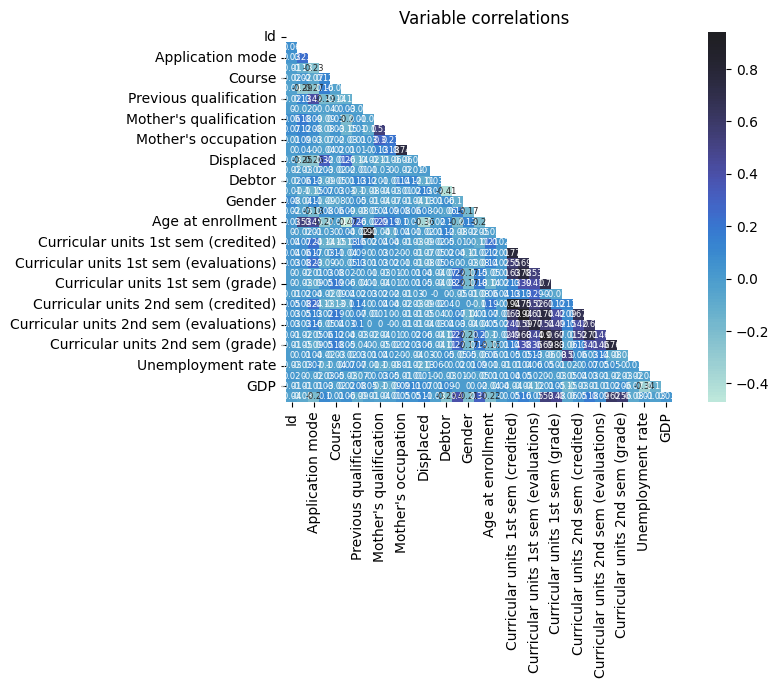

In [537]:
# clean Category column
# Graduated = 2; Enrolled = 1; Dropout = 0
train_dropout_data_2 = pd.DataFrame(train_dropout_data)

train_dropout_data_2['Category'].replace(['Graduate'],2, inplace=True)
train_dropout_data_2['Category'].replace(['Enrolled'],1, inplace=True)
train_dropout_data_2['Category'].replace(['Dropout'],0, inplace=True)

# explore and understand the data
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = 'Variable correlations'

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

# Use the heatmap function from the seaborn package
sns.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

correlation = train_dropout_data.corr().round(2)
mask = np.triu(np.ones_like(correlation, dtype=bool))
correlation_heatmap = sns.heatmap(correlation,annot=True,mask=mask ,center=1, cbar = True,annot_kws={"size":6})


[Text(0.5, 1.0, 'Category correlations')]

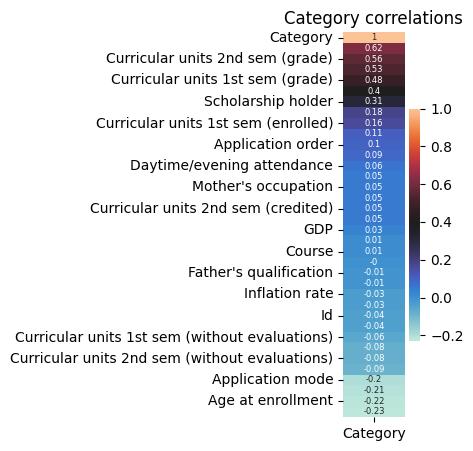

In [538]:
fig, ax = plt.subplots(figsize=(1,5))

sns.heatmap(correlation[['Category']].sort_values('Category',ascending=False ),annot=True ,center=0.4, annot_kws={"size":6}).set(title='Category correlations')

In [539]:
# format the training data for machine learning
X_train=train_dropout_data.drop('Category',axis=1) 
y_train=train_dropout_data['Category'] 

In [540]:
# format the validation data for machine learning
X_validation=validation_dropout_data.drop('Category',axis=1) 
y_validation=validation_dropout_data['Category'] 
y_validation

0        Dropout
1       Graduate
2       Graduate
3       Graduate
4        Dropout
          ...   
1323    Graduate
1324    Graduate
1325    Graduate
1326    Enrolled
1327    Graduate
Name: Category, Length: 1328, dtype: object

In [541]:
# format the test data for machine learning
X_test=test_dropout_data
# this data comes without target
X_test['Id']

0      3557
1      1980
2      1112
3      2914
4      2745
       ... 
615     335
616    1639
617    1381
618    2455
619    2004
Name: Id, Length: 620, dtype: int64

In [542]:
# print(X.dtypes)
# X.head()

In [543]:
from sklearn.ensemble import RandomForestClassifier
# Declare an instance of it
classifier = RandomForestClassifier(n_estimators=100)
#gradient boosting?
#xj boost

# Fit the model
classifier.fit(X_train,y_train)
# Generate prediction
y_pred=classifier.predict(X_test)
y_pred


array([0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0,

In [544]:
# Generate CSV
id_column= X_test['Id']

droupout_prediction=pd.DataFrame({
            'Id':id_column,
            'Category':y_pred,
}, columns= ['Id', 'Category'])
droupout_prediction.to_csv("dropout_prediction.csv", index=False)

In [545]:
# Evaluate the model
classifier.score(X_validation, y_validation)

0.0

In [546]:
# Evaluate the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
("Accuracy:",metrics.accuracy_score(y_validation.iloc[0 : len(y_pred)], y_pred))

('Accuracy:', 0.0)